In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score, f1_score, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv('customer_churn_dataset-testing-master.csv')

In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


1.Age Distribution and Churn Rate:

What is the distribution of ages among your customers? Is there a relationship between age and churn rate?

2.Gender Analysis:

What is the gender distribution of your customers? Is there any noticeable difference in churn rates between genders?

3.Tenure and Churn:

How long, on average, have your customers been with your service (tenure)? Is there any pattern between tenure and churn?

4.Usage Frequency:

How frequently do customers use your service, on average? Does usage frequency affect churn rates?

5.Support Calls and Churn:

What is the average number of support calls made by customers? Is there any correlation between support calls and churn?

6.Payment Delay:

What is the typical payment delay among customers? Does payment delay influence churn behavior?

7.Subscription Type and Contract Length:

What are the different subscription types and their proportions? Do customers with different subscription types have different churn rates? How does contract length relate to churn?

8.Total Spend and Churn:

What is the average total spend of customers? Is there any correlation between total spend and churn?

9.Last Interaction:

How recently did customers interact with your service? Is there any connection between the recency of the last interaction and churn?


In [6]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [7]:
data.shape

(64374, 12)

In [8]:
data = data.drop(columns = 'CustomerID')

In [9]:
data.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [10]:
data.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


In [12]:
data.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**EDA**

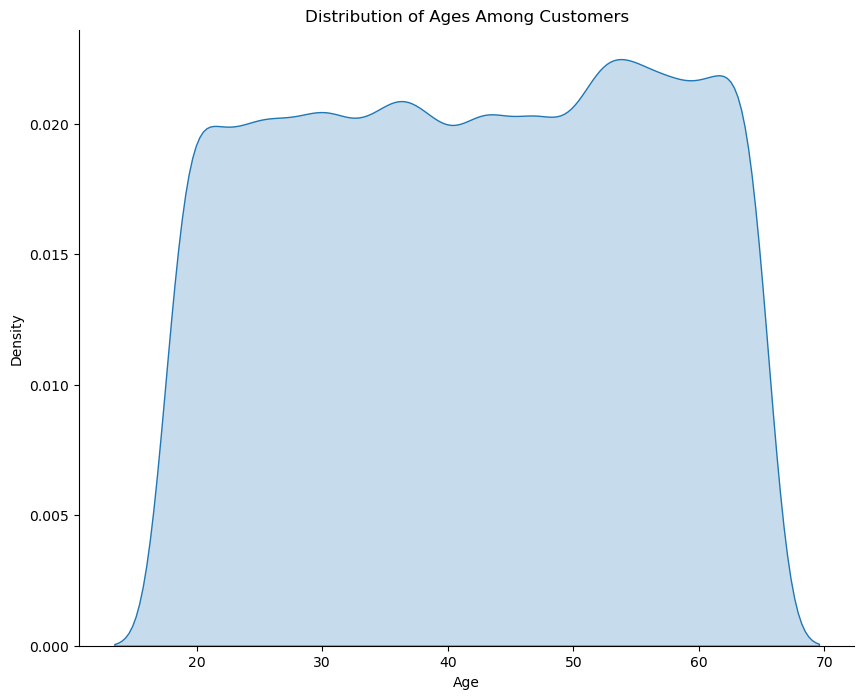

In [14]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = data , x = data.Age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\547043029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=data, palette='Set3')


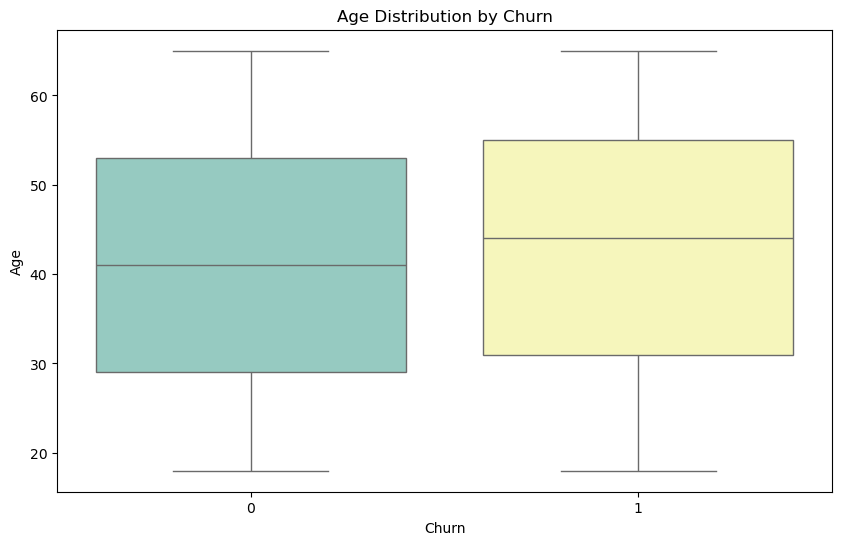

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Age', data=data, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

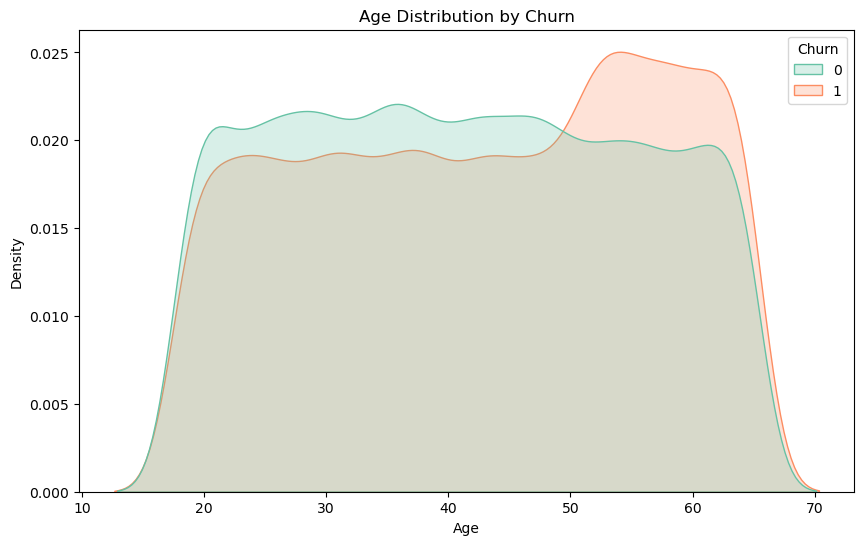

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\4177091426.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = data.groupby('AgeGroup')['Churn'].mean()
C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\4177091426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')


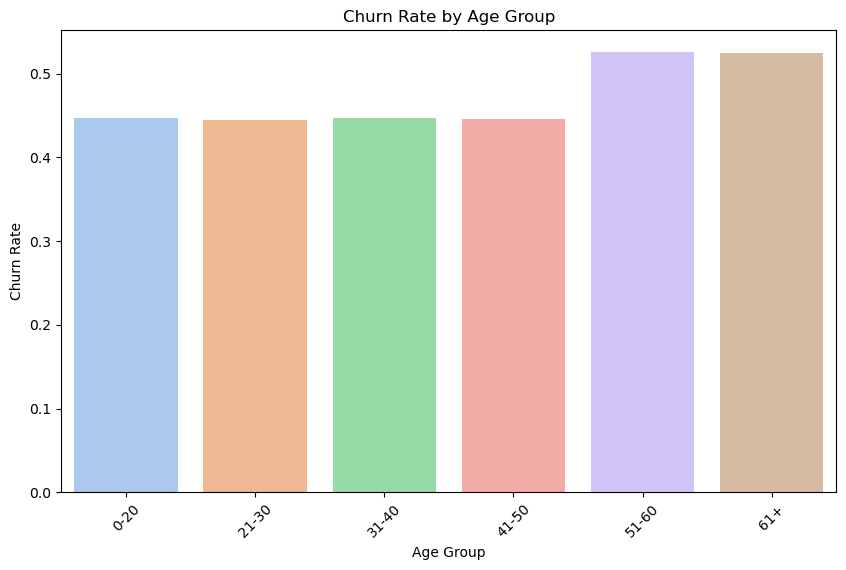

In [17]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
age_churn_rate = data.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

Age is normally distributed but is slighlty positively skewed which means we have more younger Customers

We have a significant number of customers in the 40-50 age range, with a smaller but still substantial group in the 20-30 age range

Everyone who is older than 60 Churn!!!

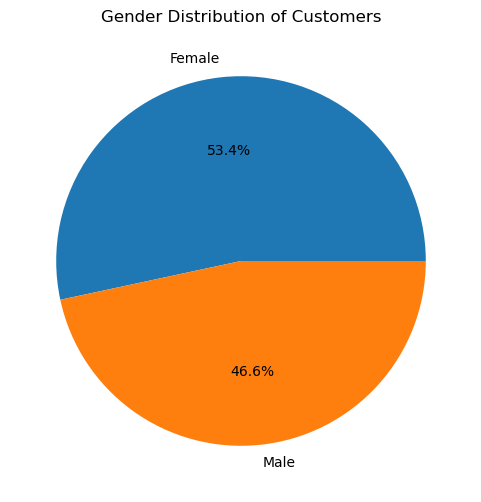

In [19]:
plt.figure(figsize=(6, 6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\933575535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')


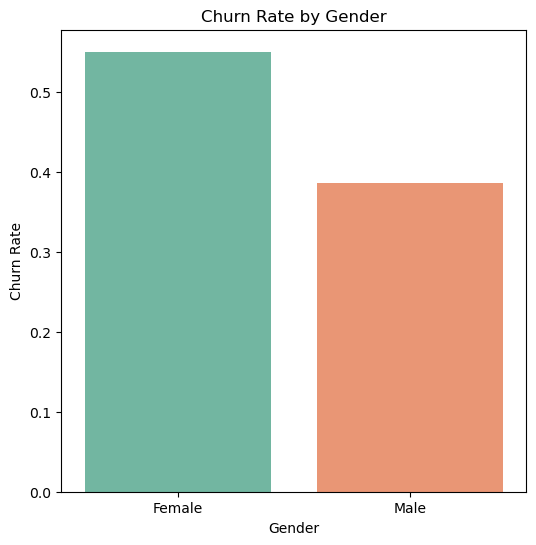

In [20]:
gender_churn_rate = data.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

More than half of the customers are Male

But the churn rate of the female customers are much higher than the male customers

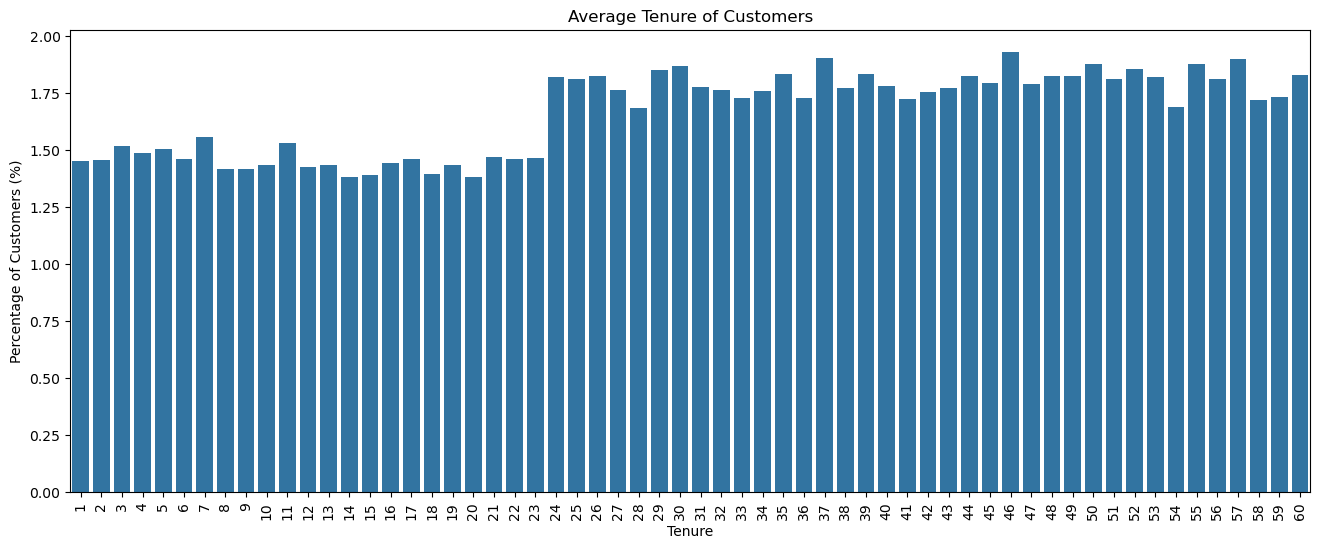

In [22]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Tenure', y='Tenure', data=data, estimator=lambda x: len(x) / len(data) * 100 )
plt.xlabel('Tenure')
plt.ylabel('Percentage of Customers (%)')
plt.title('Average Tenure of Customers')
plt.xticks(rotation=90)
plt.show()

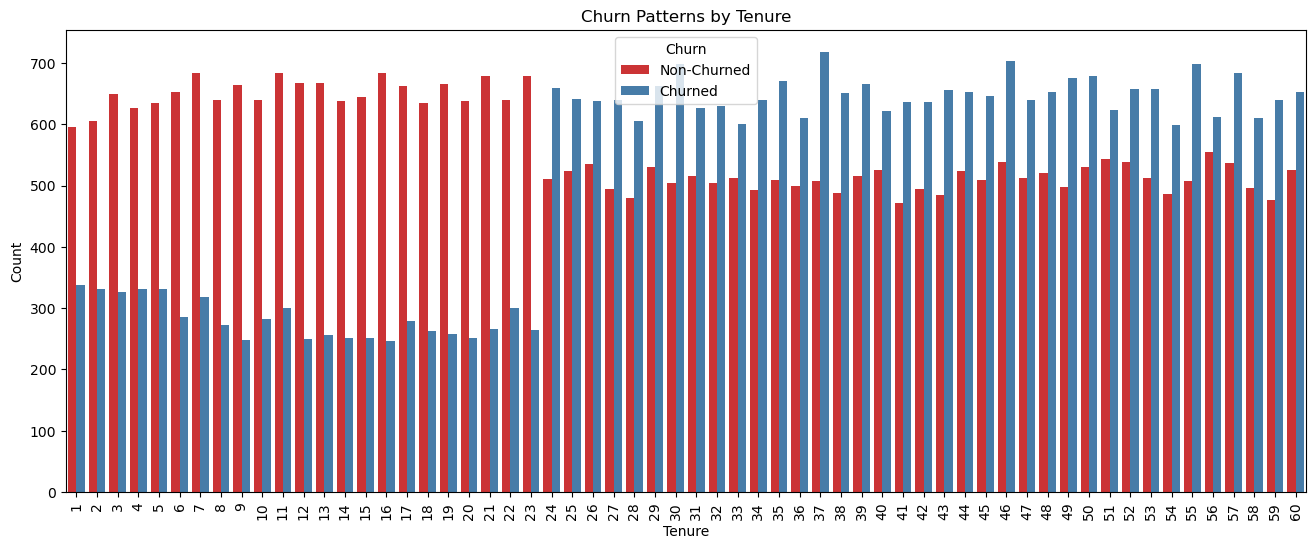

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Tenure', hue='Churn', data=data, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn Patterns by Tenure')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.xticks(rotation=90)
plt.show()

we can see that we have custmores with almost equally distributed Tenures

the churn rate in new customers(1-5 tenure) and 12 to 24 month tenure is higher than others

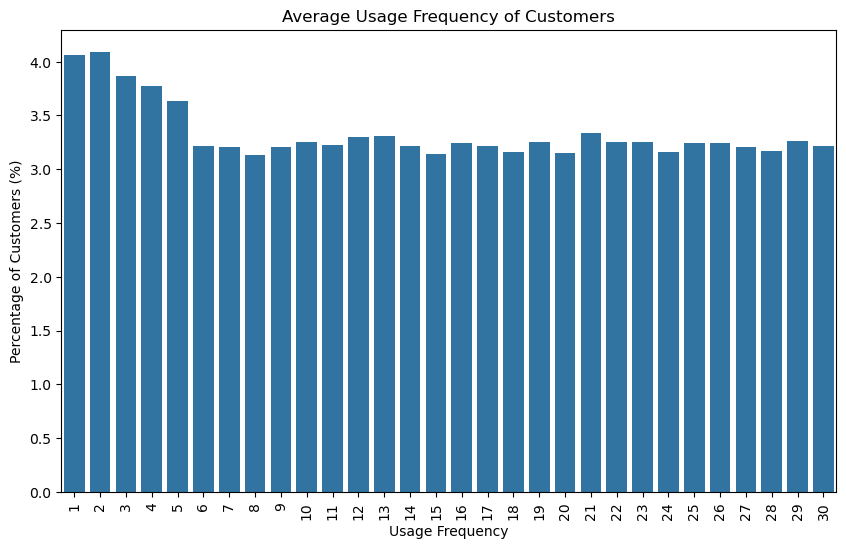

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Usage Frequency', y='Usage Frequency', data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlabel('Usage Frequency')
plt.ylabel('Percentage of Customers (%)')
plt.title('Average Usage Frequency of Customers')
plt.xticks(rotation=90)
plt.show()

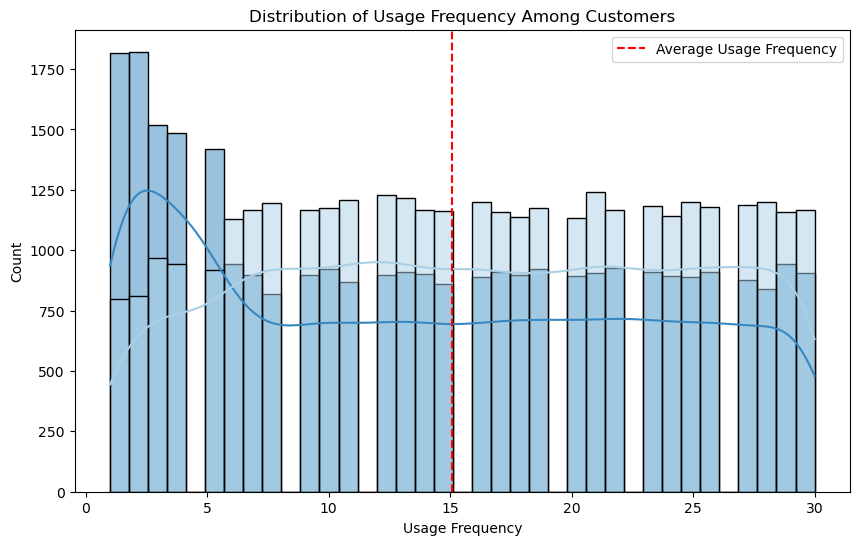

In [26]:
average_usage_frequency = data['Usage Frequency'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Usage Frequency',hue = 'Churn', kde=True, palette='Blues')
plt.axvline(average_usage_frequency, color='red', linestyle='dashed', label='Average Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.title('Distribution of Usage Frequency Among Customers')
plt.legend()
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\1923646107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='Usage Frequency', data=data, palette='Set2')


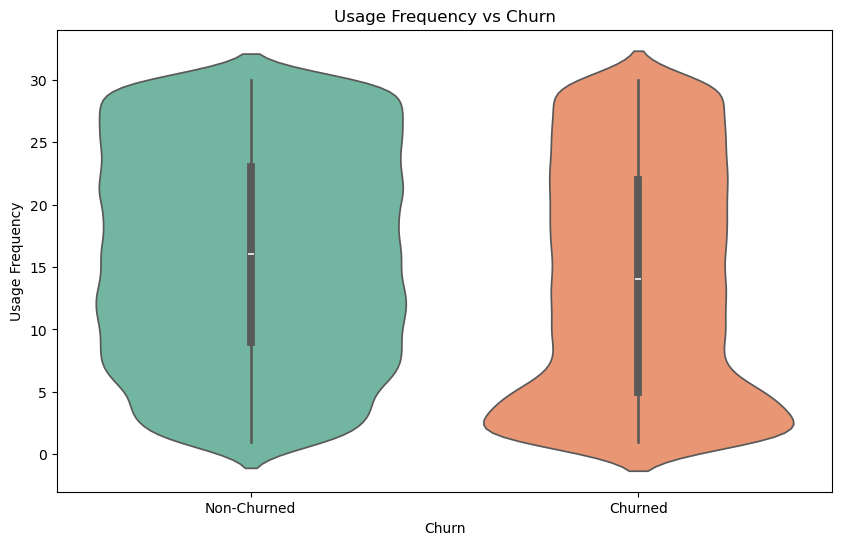

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Usage Frequency', data=data, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.title('Usage Frequency vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

The 2 first plots show that usage frequency is flat and has a uniform distribution meaning that the customers usage is on average 15

The usage freqeuncy does not seem to affect churn , only slightly lower churn rates for 0 - 10 usage frequency


In [29]:
average_support_calls = data['Support Calls'].mean()
print(f"Average Number of Support Calls: {average_support_calls}")

Average Number of Support Calls: 5.400689719451953


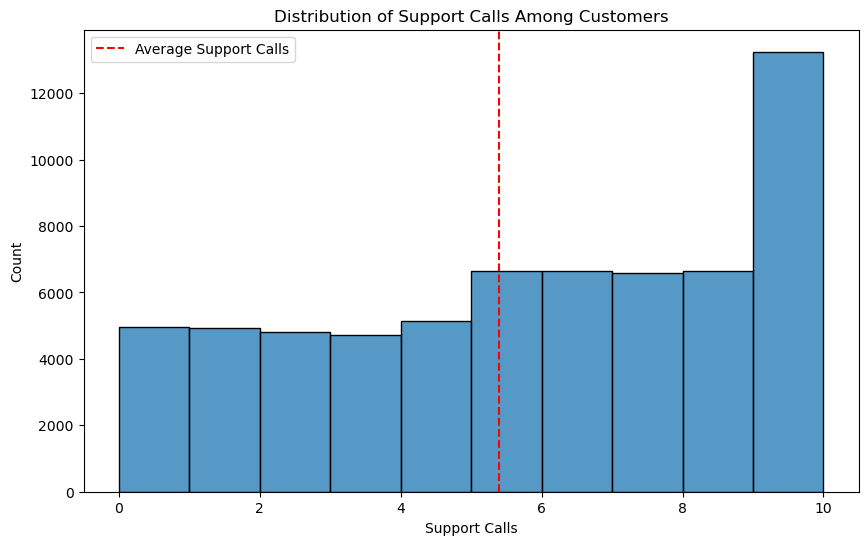

In [30]:
plt.figure(figsize = (10,6))
sns.histplot(data = data , x = 'Support Calls' , bins = 10  )
plt.axvline(average_support_calls, color='red', linestyle='dashed', label='Average Support Calls')
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title('Distribution of Support Calls Among Customers')
plt.legend()
plt.show()


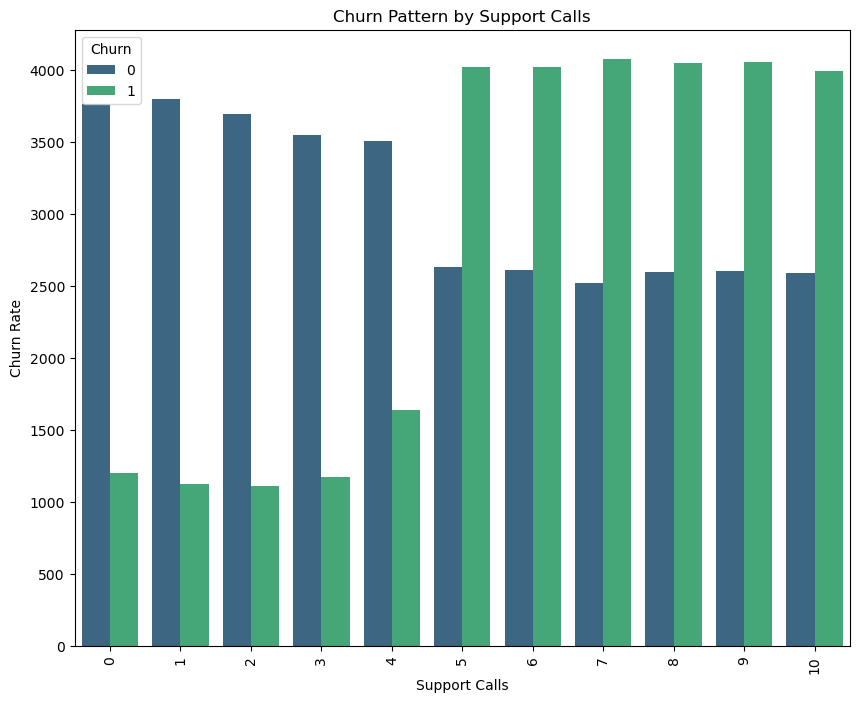

In [31]:
plt.figure(figsize = (10,8))
sns.countplot(data = data , x = 'Support Calls' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Support Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Support Calls')
plt.xticks(rotation=90)
plt.show()

On average customers call the support 3 times

Support calls are much higher from 0 to 3 times for each customer and in this range the calls seem to be successful due to the churn rate of this customers

As the support calls go higher the churn rates go higher too, to the point that for more than 5 calls there are no non churned customers and it seems the supporters are not successful in making the cutomer's problem go away

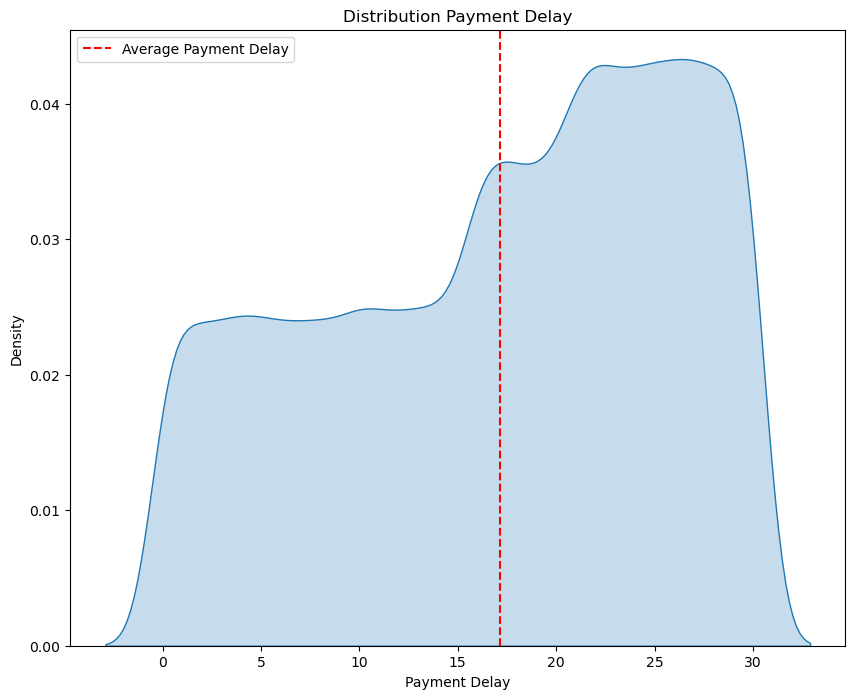

In [33]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = data, x = 'Payment Delay' , fill = True)
plt.title('Distribution Payment Delay')
avg_payment_delay = data['Payment Delay'].mean()
plt.xlabel('Payment Delay')
plt.axvline(avg_payment_delay , color = 'red' , linestyle = 'dashed' , label = 'Average Payment Delay')
plt.legend()
plt.show()

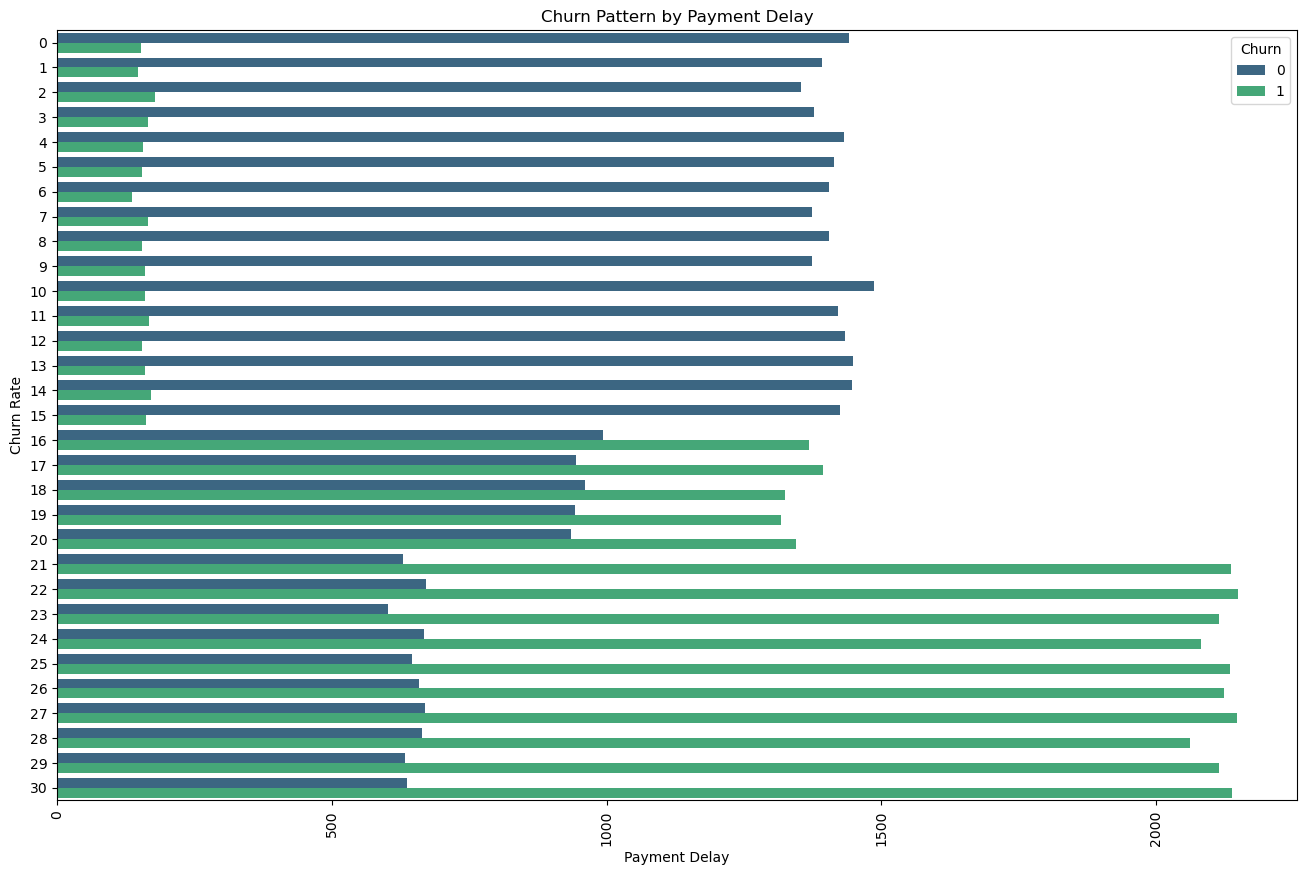

In [34]:
plt.figure(figsize = (16,10))
sns.countplot(data = data , y = 'Payment Delay' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Payment Delay')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Payment Delay')
plt.xticks(rotation=90)
plt.show()

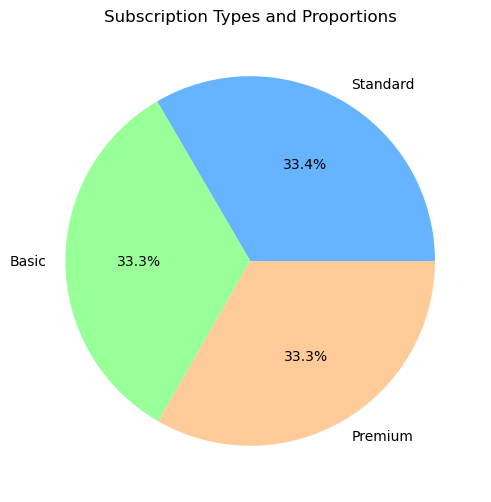

In [35]:
plt.figure(figsize=(6, 6))
subscription_counts = data['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Subscription Types and Proportions')
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\3398939292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='pastel')


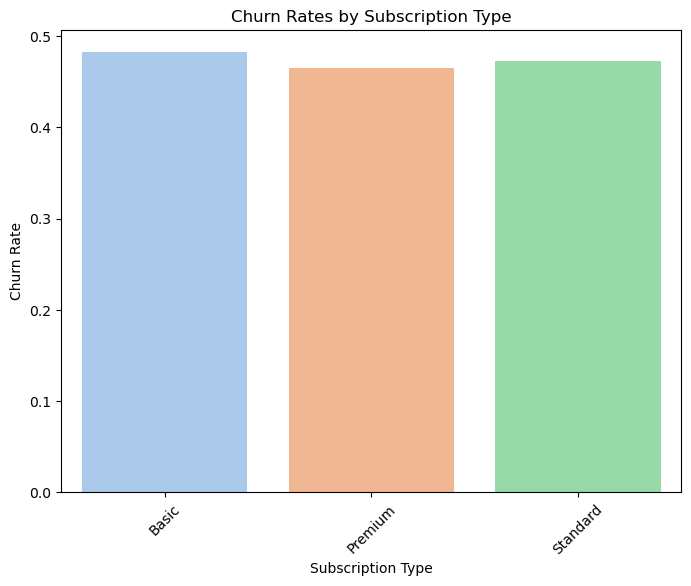

In [36]:
plt.figure(figsize=(8, 6))
subscription_churn_rate = data.groupby('Subscription Type')['Churn'].mean()
sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='pastel')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Subscription Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\665049650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract Length', y='Churn', data=data, palette='Set3')


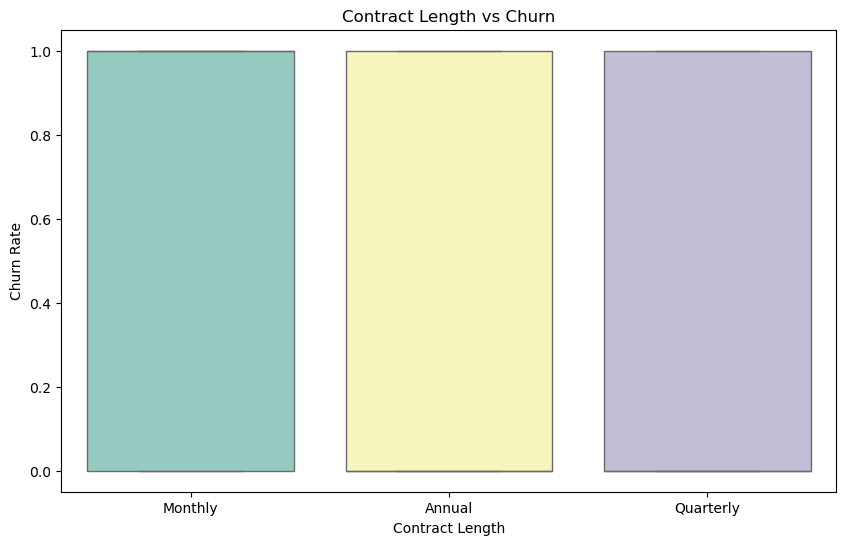

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract Length', y='Churn', data=data, palette='Set3')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.title('Contract Length vs Churn')
plt.show()

In [38]:
data[(data['Contract Length'] == 'Monthly') & (data['Churn'] == 0)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroup
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0,41-50
5,30,Male,41,14,10,10,Premium,Monthly,500,29,0,31-40
7,54,Female,36,11,0,18,Standard,Monthly,323,16,0,51-60
8,36,Male,20,5,10,8,Basic,Monthly,687,8,0,31-40
16,29,Male,54,3,6,2,Basic,Monthly,636,22,0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...
45664,43,Male,51,6,5,1,Standard,Monthly,315,7,0,41-50
45671,53,Male,20,19,7,4,Basic,Monthly,787,15,0,51-60
45676,55,Female,45,19,9,12,Basic,Monthly,766,20,0,51-60
45677,65,Male,8,13,1,27,Basic,Monthly,121,13,0,61+


The subscription types have eqaul proportions of the data

The churn rate among the subscription types is also equal

Almost half of customers with annual and quarterly contracts churn, but customers with monthly contracts all churn

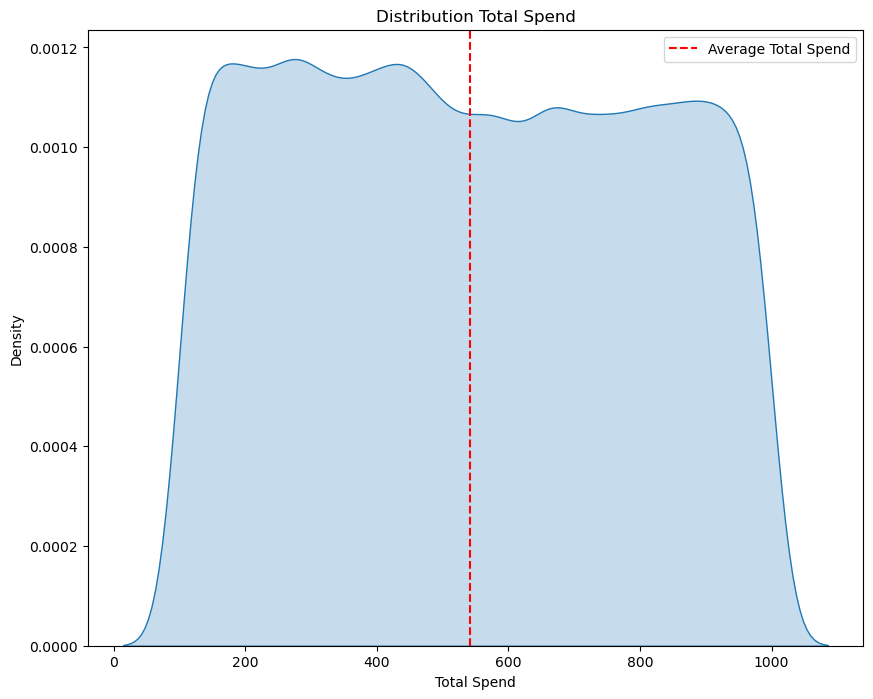

In [40]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = data , x = 'Total Spend' , fill = True )
plt.title('Distribution Total Spend')
avg_total_spend = data['Total Spend'].mean()
plt.xlabel('Total Spend')
plt.axvline(avg_total_spend , color = 'red' , linestyle = 'dashed' , label = 'Average Total Spend')
plt.legend()
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\2803169018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total Spend', data=data, palette='Set1')


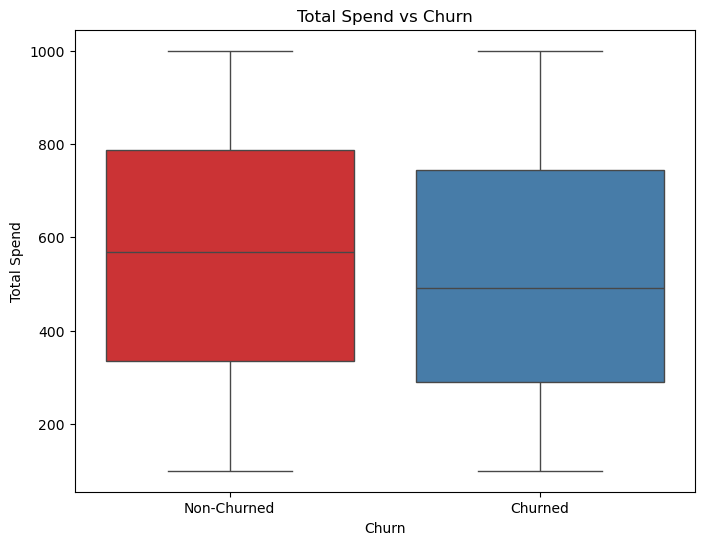

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total Spend', data=data, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.title('Total Spend vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

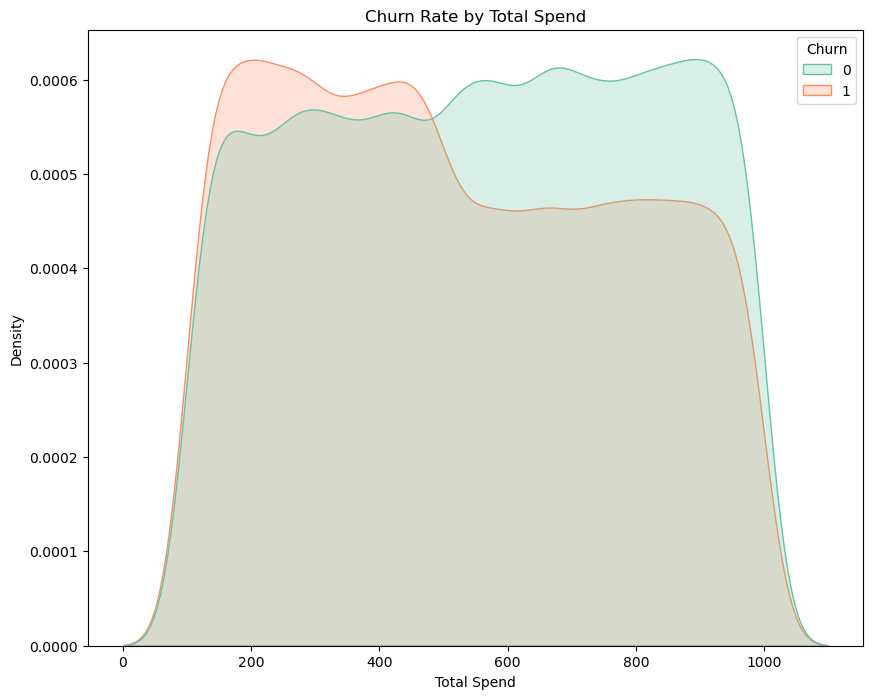

In [42]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = data , x = 'Total Spend' ,hue = 'Churn', fill = True , palette = 'Set2')
plt.title('Churn Rate by Total Spend')
plt.xlabel('Total Spend')
plt.show()

Each customer on average spends about 650$

Most customers with who spend more than 500$ tend not to churn

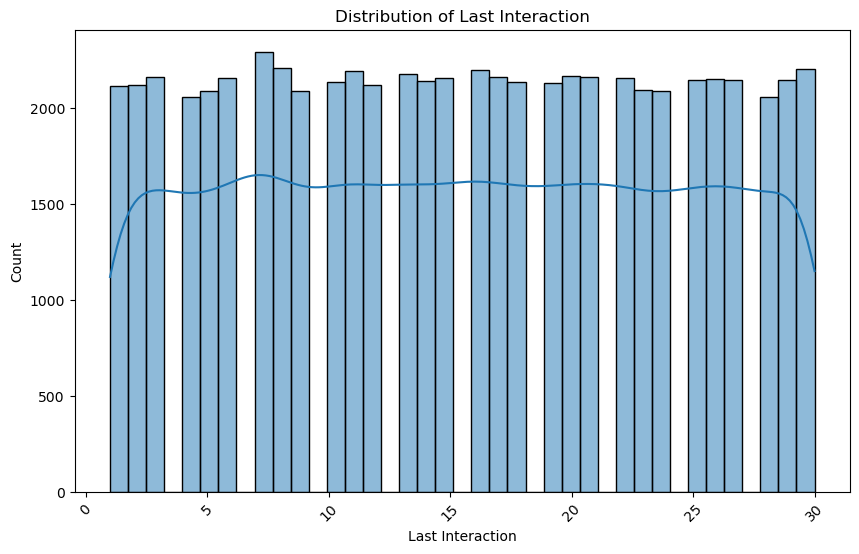

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Last Interaction', kde=True)
plt.xlabel('Last Interaction')
plt.ylabel('Count')
plt.title('Distribution of Last Interaction')
plt.xticks(rotation=45)
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\1318407976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='Last Interaction', data=data, palette='Set3')


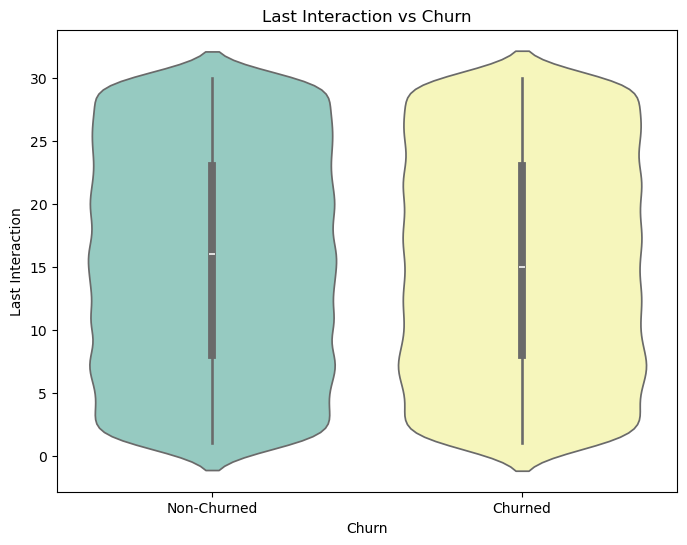

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Last Interaction', data=data, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Last Interaction')
plt.title('Last Interaction vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

Last ineteraction of customers has a uniform disribution but just slightly higher from 0 to 15

The churn rate by last inetraction shows no significant differennce so last inetraction has no or little impact on churn rate

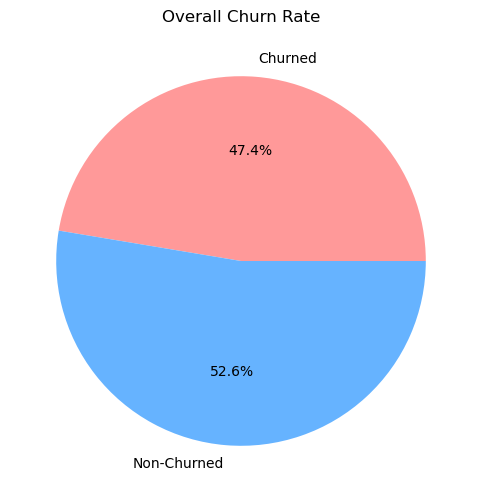

In [47]:
overall_churn_rate = data['Churn'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie([overall_churn_rate, 100 - overall_churn_rate], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Overall Churn Rate')
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\4174629939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='viridis')


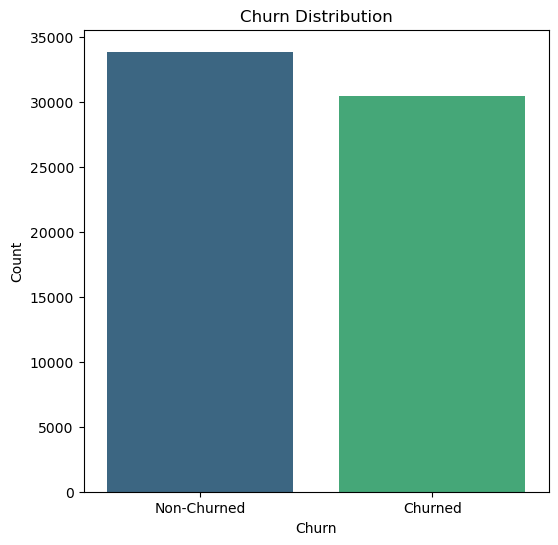

In [48]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Churn', palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

By analysing the target variable (Churn) we can see that most customers are churning!

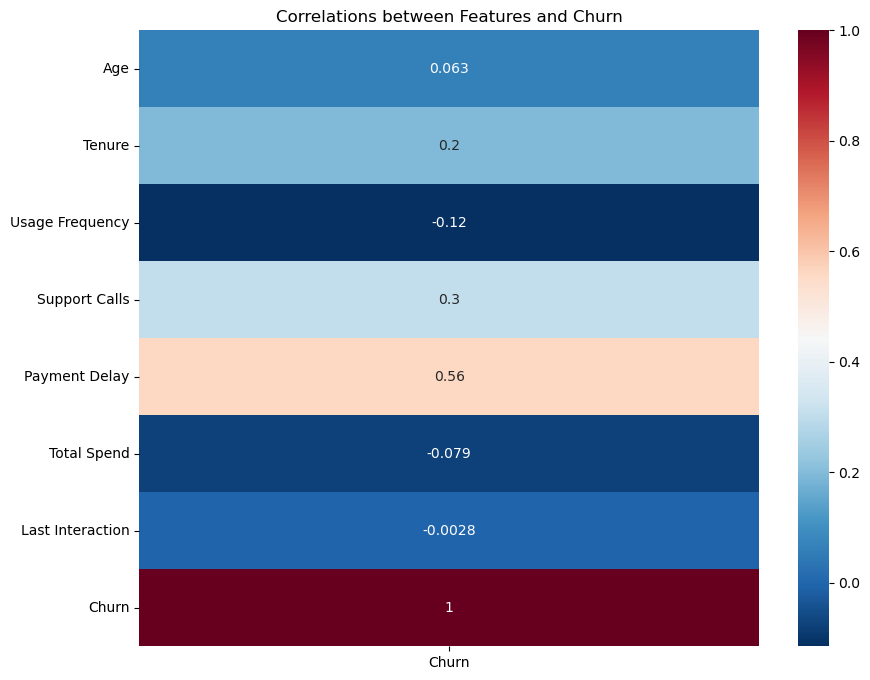

In [50]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']], annot=True, cmap='RdBu_r')
plt.title('Correlations between Features and Churn')
plt.show()

C:\Users\ajay4\AppData\Local\Temp\ipykernel_19272\1792648328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')


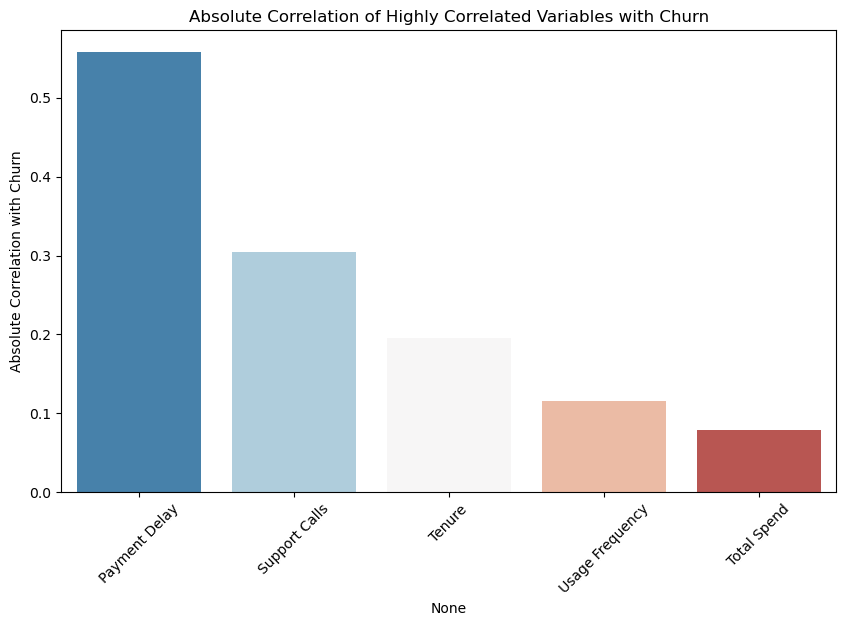

In [51]:
high_corr_vars = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Absolute Correlation of Highly Correlated Variables with Churn')
plt.xticks(rotation=45)
plt.show()

In [52]:
for column in data:
    if data[column].dtypes=='object':
        print(f'{column}: {data[column].unique()}')

Gender: ['Female' 'Male']
Subscription Type: ['Basic' 'Standard' 'Premium']
Contract Length: ['Monthly' 'Annual' 'Quarterly']


In [53]:
data.duplicated().sum()

0

In [54]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [55]:
data = pd.get_dummies(data=data , columns=['Subscription Type', 'Contract Length'])
data

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,AgeGroup,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,0,25,14,4,27,598,9,1,21-30,True,False,False,False,True,False
1,41,0,28,28,7,13,584,20,0,41-50,False,False,True,False,True,False
2,47,1,27,10,2,29,757,21,0,41-50,False,True,False,True,False,False
3,35,1,9,12,5,17,232,18,0,31-40,False,True,False,False,False,True
4,53,0,58,24,9,2,533,18,0,51-60,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,947,14,1,41-50,True,False,False,False,False,True
64370,37,1,6,1,5,22,923,9,1,31-40,False,False,True,True,False,False
64371,25,1,39,14,8,30,327,20,1,21-30,False,True,False,False,True,False
64372,50,0,18,19,7,22,540,13,1,51-60,False,False,True,False,True,False


In [56]:
data = data.drop(columns = 'AgeGroup')

In [57]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
print("X_train Shape : ",X_train.shape)
print("X_testShape : ",X_test.shape)
print("y_train Shape : ",y_train.shape)
print("y_test Shape : ",y_test.shape)

X_train Shape :  (45061, 14)
X_testShape :  (19313, 14)
y_train Shape :  (45061,)
y_test Shape :  (19313,)


In [61]:
XGB = XGBClassifier()

In [62]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred = XGB.predict(X_test)

In [64]:
accuracy = accuracy_score( y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [65]:
print('Accuracy score of the test data : ',accuracy)
print('precision score of the test data : ', precision)
print('Recall score of the test data : ', recall)
print('F1 score of the test data : ', f1)

Accuracy score of the test data :  0.9999482214052711
precision score of the test data :  0.9998910675381264
Recall score of the test data :  1.0
F1 score of the test data :  0.9999455308023313


In [66]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10134
           1       1.00      1.00      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



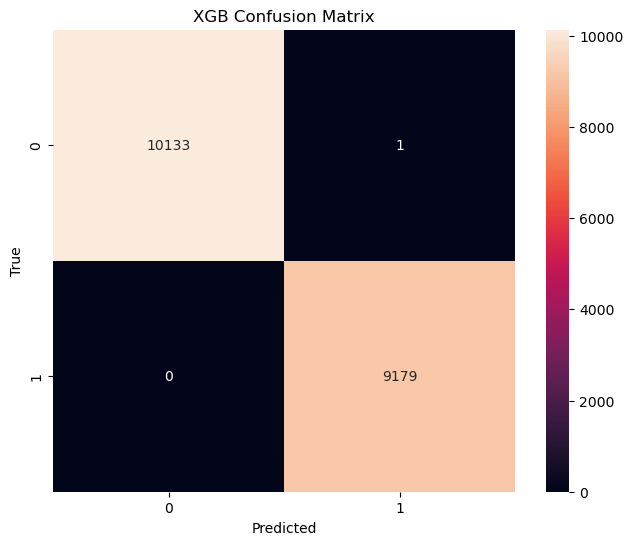

In [67]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',  square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGB Confusion Matrix')
plt.show()

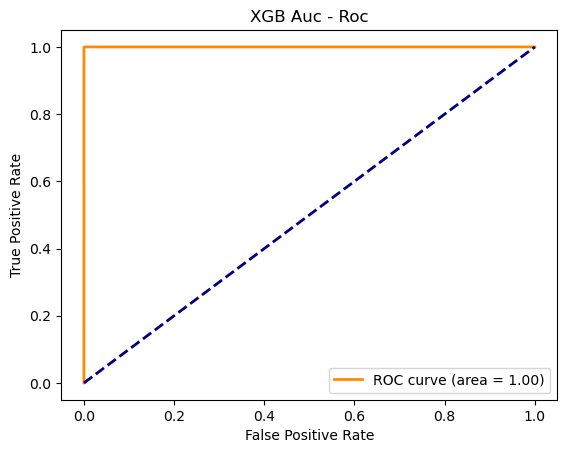

In [68]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred )
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Auc - Roc')
plt.legend(loc="lower right")
plt.show()

In [69]:
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.9999506611407144


**Random Forest Classifier**

In [71]:
RF_model = RandomForestClassifier()

In [72]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred_rf = RF_model.predict(X_test)

In [74]:
accuracy_rf = accuracy_score( y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [75]:
print('Accuracy score of the test data : ',accuracy_rf)
print('precision score of the test data : ', precision_rf)
print('Recall score of the test data : ', recall_rf)
print('F1 score of the test data : ', f1_rf)

Accuracy score of the test data :  0.9985501993475897
precision score of the test data :  0.9992362247681397
Recall score of the test data :  0.9977121690815993
F1 score of the test data :  0.9984736153510685


In [76]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10134
           1       1.00      1.00      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



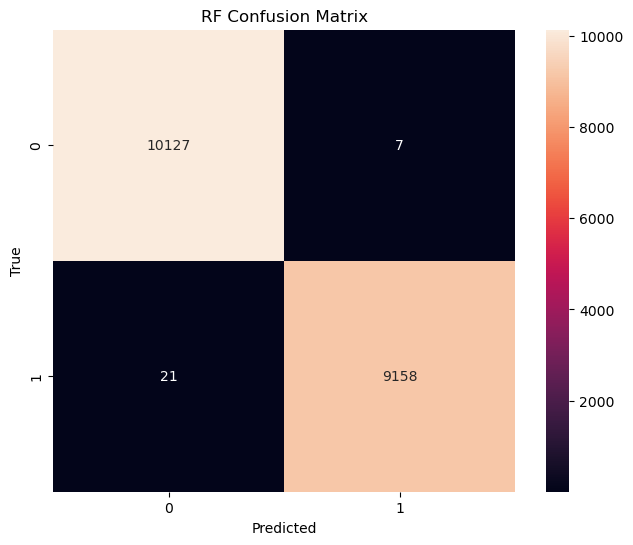

In [77]:
cm = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RF Confusion Matrix')
plt.show()

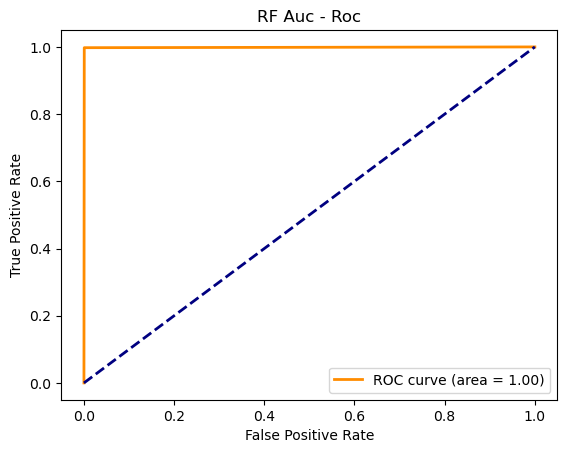

In [78]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Auc - Roc')
plt.legend(loc="lower right")
plt.show()

In [79]:
auc_roc = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.9985107125258006


In [80]:
log_reg_model = LogisticRegression()

**Logistc Regression**

In [82]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred_lr = log_reg_model.predict(X_test)

In [84]:
accuracy_lr = accuracy_score( y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [85]:
print('Accuracy score of the test data : ',accuracy_lr)
print('precision score of the test data : ', precision_lr)
print('Recall score of the test data : ', recall_lr)
print('F1 score of the test data : ', f1_lr)

Accuracy score of the test data :  0.8290270802050432
precision score of the test data :  0.8163419097857681
Recall score of the test data :  0.826124850201547
F1 score of the test data :  0.8212042451808533


In [86]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     10134
           1       0.82      0.83      0.82      9179

    accuracy                           0.83     19313
   macro avg       0.83      0.83      0.83     19313
weighted avg       0.83      0.83      0.83     19313



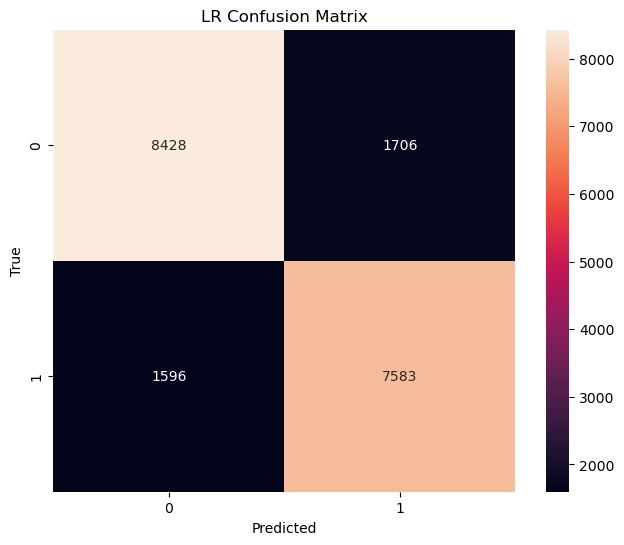

In [87]:
cm = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LR Confusion Matrix')
plt.show()

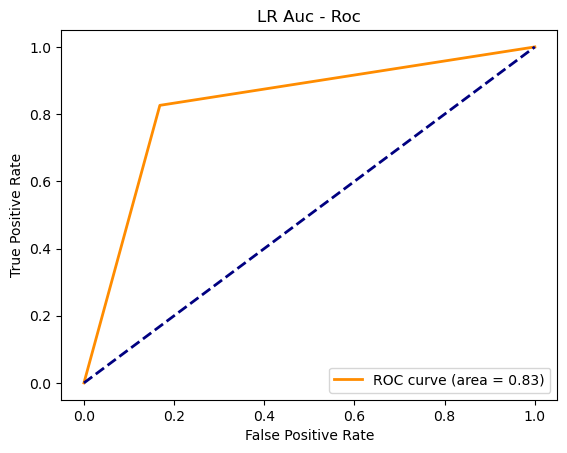

In [88]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_lr)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Auc - Roc')
plt.legend(loc="lower right")
plt.show()

In [89]:
auc_roc = roc_auc_score(y_test, y_pred_lr)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.8288903311595854
